In [5]:
import pde
import numpy as np

In [4]:
from pde import CartesianGrid

In [6]:
grid = CartesianGrid([(0.1,2),(-np.pi,np.pi)], [64,128], [False,True])

In [ ]:
initial_state = ScalarField.from_expression(grid,"exp(-((x-0.5)**2+y**2)/0.25)")
initial_state /= np.sqrt(initial_state.to_scalar("norm_squared").integral.real)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from sympy import init_session; init_session()

IPython console for SymPy 1.12 (Python 3.11.6-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



In [3]:
class PoissonBracket:
    def __init__(self, q, p):
        """
        q : list of canonical coordinates
        p : list of canonical momenta
        """
        self.dim = len(q)
        if len(p) != self.dim:
            raise Warning("Mismatch in canonical conjugate pair dimensions.")
        self.q = q
        self.p = p
    def __call__(self, f, g):
        """
        f, g : Functions of canonical conjugate pairs p, q
        """
        bracket = 0
        for i in range(self.dim):
            bracket += f.diff(self.p[i])*g.diff(self.q[i]) - g.diff(self.p[i])*f.diff(self.q[i])
        return(bracket)

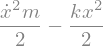

In [4]:
x, xd, k, m = symbols(r"x \dot{x} k m")
L_x_xd = Rational(1,2)*m*xd**2 - Rational(1,2)*k*x**2
L_x_xd

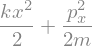

In [5]:
px = symbols(r"p_x")
xd_px = solve(L_x_xd.diff(xd)-px, xd)[0]
px_xd = solve(L_x_xd.diff(xd)-px, px)[0]
H_x_px = px*xd_px-L_x_xd.subs(xd,xd_px)
H_x_px

In [6]:
PB_x_px = PoissonBracket([x], [px])

In [7]:
rho_x_px = Function("rho")(x,px)

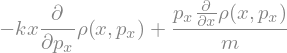

In [8]:
PB_x_px(H_x_px,rho_x_px)

In [9]:
from pde import PDE, CartesianGrid, ScalarField, MemoryStorage

In [10]:
grid = CartesianGrid([(-2,2),(-2,2)], [64,64], [False,False])

In [11]:
initial_state = ScalarField.from_expression(grid,"exp(-((x-0.5)**2+y**2)/0.25)")
initial_state /= np.sqrt(initial_state.to_scalar("norm_squared").integral.real)

In [12]:
m0, k0 = 1,1
eq = PDE({"ρ":f"-x*{k0}*d_dy(ρ)+y/{m0}*d_dx(ρ)"})

In [41]:
storage = MemoryStorage()
sol = eq.solve(initial_state, t_range=2.5, dt=1e-5, tracker=["progress", storage.tracker(0.5)])

  0%|          | 0/2.5 [00:00<?, ?it/s]

In [42]:
for i,t in enumerate(storage.times):
    fig, ax = plt.subplots()
    ax.pcolormesh(grid.axes_coords[0],grid.axes_coords[1],storage.data[i].T)
    ax.set_title(f"t={t:0.2f}")
    fig.savefig(f"{t:0.2f}.png")

In [46]:
np.sqrt(sol.to_scalar("norm_squared").integral.real)